# Coupling
This notebook investigates coupled motion using transfer matrices.

## Setup 

In [1]:
import sys
import numpy as np
import numpy.linalg as la
import matplotlib
from matplotlib import pyplot as plt, animation, lines
import proplot as plot

sys.path.append('/Users/46h/Research/code/accphys')
from tools import (
    plotting as myplt,
    animation as myanim,
    envelope_analysis as ea,
    coupling as BL,
    matrix_lattice,
    utils)
from tools.envelope_analysis import Envelope
from tools.matrix_lattice import MatrixLattice, fodo
from tools.utils import show, play

In [2]:
plot.rc['figure.facecolor'] = 'white'
plot.rc['cycle'] = 'default'
plot.rc['style'] = None # `None` for default proplot style
plot.rc['savefig.dpi'] = 'figure' # proplot default is 1200, which makes inline animations appear huge

## Create lattice 

In [6]:
L = 5.0
k1, k2 = 0.2, 0.2
lattice = fodo(k1, k2, L, fill_fac=0.5, quad_tilt=0, start='drift')

In [4]:
show(lattice.M, 'M', dec=3)
print()
lattice.print_params('2D')
print()
lattice.print_params('4D')

M =
⎡0.246  4.86    0.0    0.0 ⎤
⎢                          ⎥
⎢-0.13  1.494   0.0    0.0 ⎥
⎢                          ⎥
⎢ 0.0    0.0   1.494  4.86 ⎥
⎢                          ⎥
⎣ 0.0    0.0   -0.13  0.246⎦

2D lattice parameters
---------------------
mux = 29.56
muy = 29.56
nux = 0.08
nuy = 0.08
bx = 9.85
by = 9.85
ax = -1.26
ay = 1.26

4D lattice parameters
---------------------
a1x = -1.26
a1y = 0.00
a2x = 0.00
a2y = 1.26
b1x = 9.85
b1y = 0.00
b2x = 0.00
b2y = 9.85
u = -0.00
nu1 = -0.00
nu2 = -0.00
mu1 = 29.56
mu2 = 29.56


## Eigenvalues and eigenvectors 

Below the four eigenvalues are plotted in the complex plane. The eigenvalues will lie on the unit circle if the lattice is stable.

[0.8698787+0.49326569j 0.8698787-0.49326569j 0.8698787+0.49326569j
 0.8698787-0.49326569j]


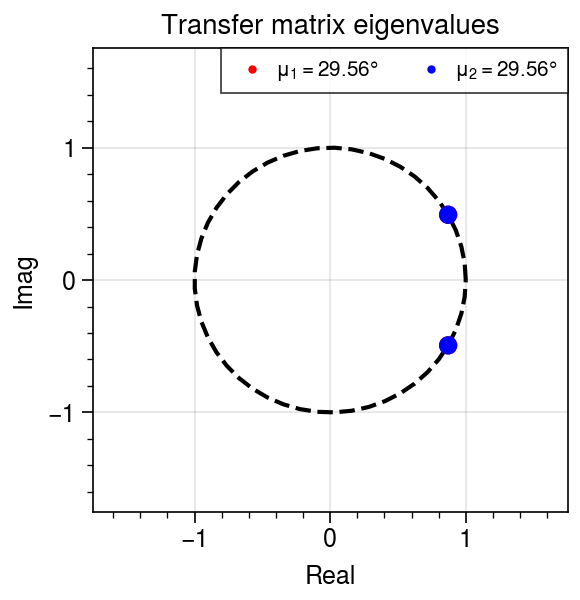

In [24]:
fig, ax = plot.subplots(figsize=(2.9, 3))
myplt.eigvals_complex_plane(ax, lattice.eigvals)
ax.set_title('Transfer matrix eigenvalues')
plt.savefig('eigvals.png', dpi=500, facecolor='white')

Track a particle which is a linear combination of the eigenvectors, i.e.:
$$
\mathbf{x} = Re \left[ \sqrt{\varepsilon_1}\mathbf{v}_1 e^{i\psi_1} + \sqrt{\varepsilon_2}\mathbf{v}_2 e^{i\psi_2} \right],
$$
where $\mathbf{v}_l$ are the eigenvectors, $\psi_l$ are initial phases, and $\varepsilon_l$ are initial amplitudes.

In [28]:
nturns = 100
eps4D = 50 # [mm-mrad]
ratio = 1. # eps2 / eps1
psi1 = np.radians(0)
psi2 = np.radians(90)

In [29]:
eps1 = np.sqrt(eps4D / ratio)
eps2 = ratio * eps1
v1, v2 = lattice.v1, lattice.v2
x1 = np.real(np.sqrt(eps1) * v1 * np.exp(1j*psi1)) # mode 1 contribution
x2 = np.real(np.sqrt(eps2) * v2 * np.exp(1j*psi2)) # mode 2 contribution
x = x1 + x2

X1 = lattice.track_part(x1, nturns)
X2 = lattice.track_part(x2, nturns)
X = lattice.track_part(x, nturns)

In [30]:
anim = myanim.corner_onepart(X, vecs=[X1, X2], fps=5, text_fmt='Period = {}')
play(anim)